In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

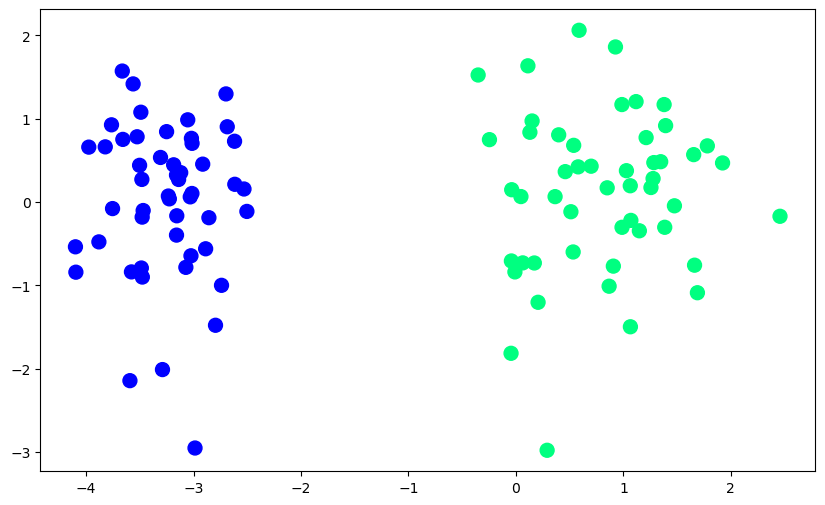

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Using Sklearn

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='sag')
lr.fit(X,y)

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
lr.intercept_, lr.coef_

(array([5.76958574]), array([[4.79571723, 0.20916485]]))

In [6]:
m1 = -(lr.coef_[0][0] / lr.coef_[0][1])
b1 = -(lr.intercept_ / lr.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input_lr = m1*x_input + b1

(-3.0, 2.0)

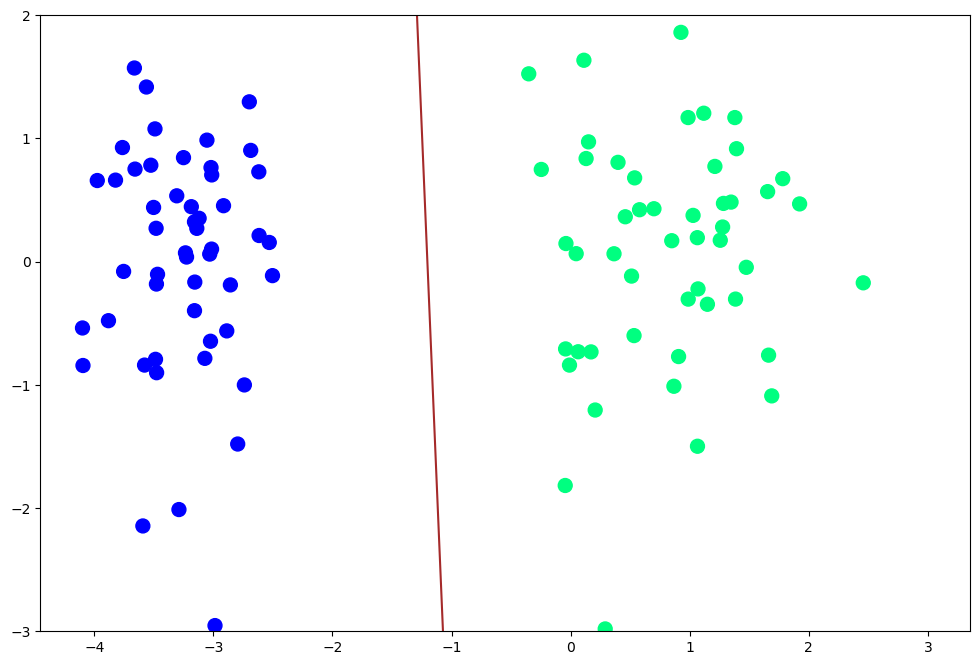

In [10]:
plt.figure(figsize=(12,8))
plt.plot(x_input,y_input_lr,color='brown')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using Gradeit Descent
![A descriptive alt text](../logistic_regression_gd_weight.png)

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
def logisticRegressionGD(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    epochs = 5000
    
    for i in range(epochs):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr * (np.dot( (y-y_hat), X )  /X.shape[0])
        
    return weights[0], weights[1:]

In [13]:
intertcept_, coef_ = logisticRegressionGD(X,y)
intertcept_, coef_

(5.833388649053249, array([4.83926872, 0.21182255]))

In [14]:
m2 = -(coef_[0]/coef_[1])
b2 = -(intertcept_/coef_[1])

In [15]:
y_input_GD = m2 * x_input + b2

(-3.0, 2.0)

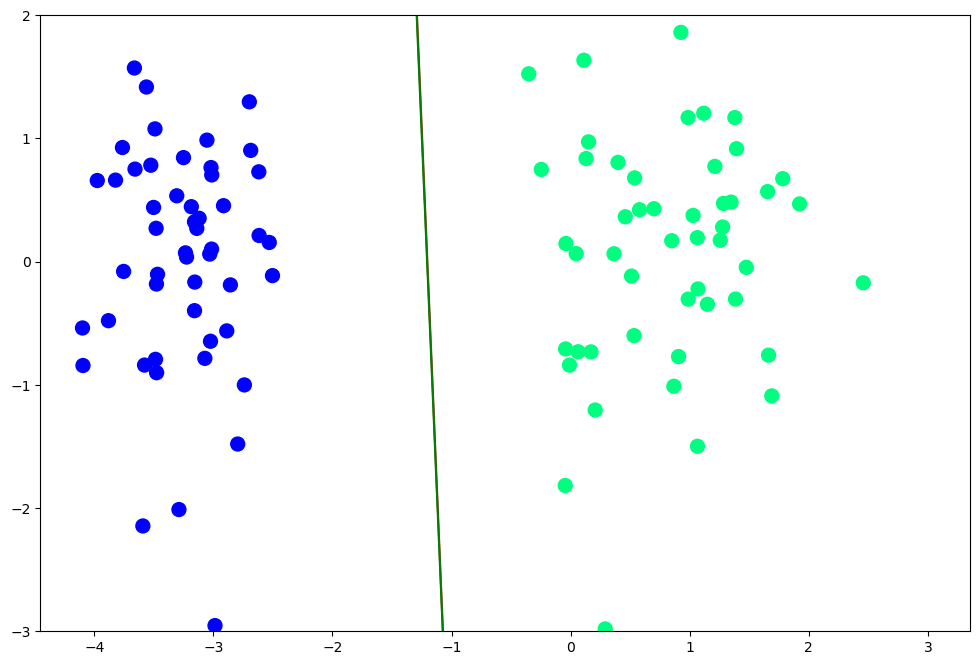

In [16]:
plt.figure(figsize=(12,8))
plt.plot(x_input,y_input_lr,color='brown')
plt.plot(x_input,y_input_GD,color='green')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)